## Demonstration of Selected Augmentation Techniques

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates common augmentation techniques for audio signals. We consider

1. temporal shifts
2. additive noise
3. temporal stretching
4. pitch shifting

applied to a speech sample. Note, the chosen parameters exaggerate the effects in order to make them visible/audible.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

The example signal is loaded

<audio src="../data/speech.wav" controls>

In [2]:
speech, fs = sf.read('../data/speech.wav')

### Temporal Shifts

First the (temporal) shift of a signal is considered. Different techniques are used for this purpose. For instance

1. Roll the signal by a given number of samples: The signal is shifted and the samples that are left over at the beginning or end are appended to the end or beginning, respectively.

2. Shift and discard the samples left over at the beginning or end of the signal.

3. Pad the signal with zeros at the beginning and end, and shift the zero padded signal.

The first two variants result in the same signal length the latter one in a signal with increased length. The third technique is implemented and illustrated in the following. Note, only a part of the signal is plotted for the sake of visualisation.

In [3]:
def shift(signal, shift, max_shift=50):
    '''Shifts a signal by a given number of samples.'''
    signal_zp = np.concatenate((np.zeros(max_shift), signal, np.zeros(max_shift)))
    
    return np.roll(signal_zp, shift)

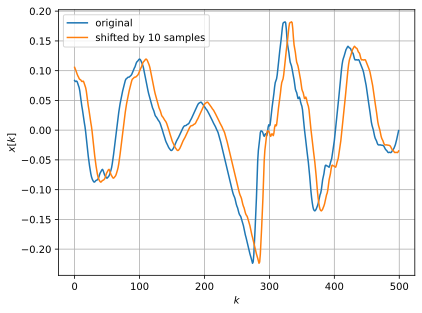

In [4]:
speech_wos = shift(speech, 0)
speech_ws = shift(speech, 10)

plt.plot(speech_wos[140800:141300], label='original')
plt.plot(speech_ws[140800:141300], label='shifted by 10 samples')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid()

### Additive Noise

Adding a random signal $n[k]$ to the existing example $x[k]$

\begin{equation*}
x_a[k] = x[k] + n[k]
\end{equation*}

is a common augmentation technique. The amount of noise is often quantified in terms of the Signal-to-Noise ratio (SNR) defined as follows

\begin{equation*}
\text{SNR} = 10 \cdot \log_{10} \left( \frac{\sigma_x^2}{\sigma_n^2} \right) \qquad \text{in dB}
\end{equation*}

where $\sigma_x^2$ and $\sigma_n^2$ denote the variances of the signals $x[k|$ and $n[k]$, respectively. In the following the superposition of a random signal is illustrated, drawn from a gaussian (normal) distribution.

In [5]:
def additive_gaussian_noise(signal, SNR):
    '''Adds gaussian (normal) distributed noise to signal.'''
    sigma_x = np.var(signal)
    sigma_n = sigma_x * 10**(- SNR/10)
    signal_wn = signal + np.sqrt(sigma_n) * np.random.normal(size=len(signal))
    
    return signal_wn

Augmented signals with three different SNRs are computed. Please listen to the signals to get an aural impression.

In [6]:
for SNR in [40, 20, 10]:
    speech_wn = additive_gaussian_noise(speech, SNR)
    sf.write('speech_wnoise_SNR_{}.wav'.format(SNR), speech_wn, fs)

**SNR = 40 dB**

<audio src="speech_wnoise_SNR_40.wav" controls>

**SNR = 20 dB**

<audio src="speech_wnoise_SNR_20.wav" controls>

**SNR = 10 dB**

<audio src="speech_wnoise_SNR_10.wav" controls>

### Temporal Stretching

We now consider changing the speed of an audio signal while not changing its [pitch](https://en.wikipedia.org/wiki/Pitch_(music)). The signal processing is realized by the function [`librosa.effects.time_stretch`](https://librosa.org/doc/main/generated/librosa.effects.time_stretch.html). Augmented signals with two different stretching factors are computed. Please listen to the signals to get an aural impression.

In [7]:
for rate in [.8, 1.2]:
    speech_streched = librosa.effects.time_stretch(speech, rate)
    sf.write('speech_streched_{}.wav'.format(rate), speech_streched, fs)

**Temporal stretching by + 20 %**

<audio src="speech_streched_1.2.wav" controls>

**Temporal stretching by - 20 %**

<audio src="speech_streched_0.8.wav" controls>

### Pitch Shifting

We now consider changing the pitch of an audio signal without changing its speed. The signal processing is realized by the function [`librosa.effects.pitch_shift`](https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html). Augmented signals with two different pitch shifts are computed. Please listen to the signals to get an aural impression.

In [8]:
for shift in [-2, 2]:
    speech_shifted = librosa.effects.pitch_shift(speech, fs, n_steps=shift)
    sf.write('speech_pitchshifted_{}.wav'.format(shift), speech_shifted, fs)

**Pitch increased by $\frac{1}{6}$ of an Octave**

<audio src="speech_pitchshifted_2.wav" controls>

**Pitch decreased by $\frac{1}{6}$ of an Octave**

<audio src="speech_pitchshifted_-2.wav" controls>

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.